In [31]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
class Simulation:
    def __init__(self, risk_reward, roi):
        self.risk_reward = risk_reward
        self.roi = roi
        self.win_rate = self.calculate_win_rate()

        self.equity_curves = []
        self.drawdowns = []
    
    def calculate_win_rate(self):
        return (1 + self.roi) / (1 + self.risk_reward)

    def __str__(self) -> str:
        return f"Risk Reward: {self.risk_reward}, Win Rate: {self.win_rate}"

In [33]:
risk_reward_ratios = [0.5, 1.0, 2.0, 3.0, 5.0, 10.0]
equity = 100
num_trades = 100
simulations = []

for risk_reward in risk_reward_ratios:
    sim = Simulation(risk_reward, roi=0.1)
    simulations.append(sim)

# print the simulations array
for sim in simulations:
    print(sim)


Risk Reward: 0.5, Win Rate: 0.7333333333333334
Risk Reward: 1.0, Win Rate: 0.55
Risk Reward: 2.0, Win Rate: 0.3666666666666667
Risk Reward: 3.0, Win Rate: 0.275
Risk Reward: 5.0, Win Rate: 0.18333333333333335
Risk Reward: 10.0, Win Rate: 0.1


In [34]:
# Run the Monte Carlo simulation for each risk-reward ratio
num_simulations = 100000

for sim in simulations:
    for _ in range(num_simulations):
        trades = np.random.rand(num_trades)

        trade_outcomes = np.where(trades < sim.win_rate, sim.risk_reward, -1)
        equity_curve = equity + np.cumsum(trade_outcomes)
        
        sim.equity_curves.append(equity_curve)        
        
        # Calculate drawdown
        max_curve = np.maximum.accumulate(equity_curve) 
        drawdown = (equity_curve - max_curve) / max_curve * 100
        sim.drawdowns.append(drawdown)



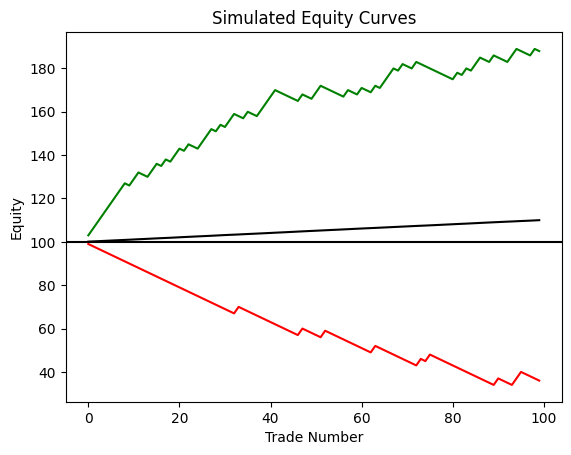

In [35]:
# Show a single equity curve
id = 3
win_rate = simulations[id].win_rate
risk_reward = simulations[id].risk_reward
show_all = False

# Show all equity curves
if show_all:
    for equity_curve in simulations[id].equity_curves:   
        plt.plot(equity_curve)
else:
    # Show the average equity curve, best and worst equity curve
    sim = simulations[id]
    avg_equity_curve = np.mean(sim.equity_curves, axis=0)
    worst_equity_curve = np.min(sim.equity_curves, axis=0)
    best_equity_curve = np.max(sim.equity_curves, axis=0)

    # Plot the average equity curve
    plt.plot(avg_equity_curve, color='black', linestyle='-', label='Average')
    plt.plot(worst_equity_curve, color='red', linestyle='-', label='Worst')
    plt.plot(best_equity_curve, color='green', linestyle='-', label='Best')
    # plt.ylim([0, 320])

plt.axhline(equity, color='black', linestyle='-')

# Add labels and title to the plot
plt.title('Simulated Equity Curves')
plt.xlabel('Trade Number')
plt.ylabel('Equity')
plt.show()

6


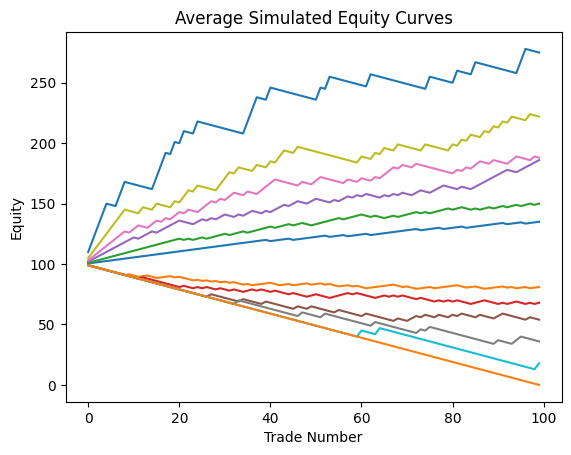

In [43]:
for sim in simulations:
    avg_equity_curve = np.mean(sim.equity_curves, axis=0)
    # worst equity curve
    worst_equity_curve = np.min(sim.equity_curves, axis=0)
    # best equity curve
    best_equity_curve = np.max(sim.equity_curves, axis=0)

    plt.plot(best_equity_curve, label=f'best {sim.risk_reward}')
    # plt.plot(avg_equity_curve, label=f'Risk-Reward Ratio: {sim.risk_reward}')
    plt.plot(worst_equity_curve, label=f'worst {sim.risk_reward}')

print(len(simulations))

# Add labels and title to the plot
plt.title('Average Simulated Equity Curves')
plt.xlabel('Trade Number')
plt.ylabel('Equity')
# plt.legend()
plt.show()

[30.521980576781917, 58.49956309383935, 113.30228227089596, 170.3599344927837, 280.9891447899754, 557.243570659203]


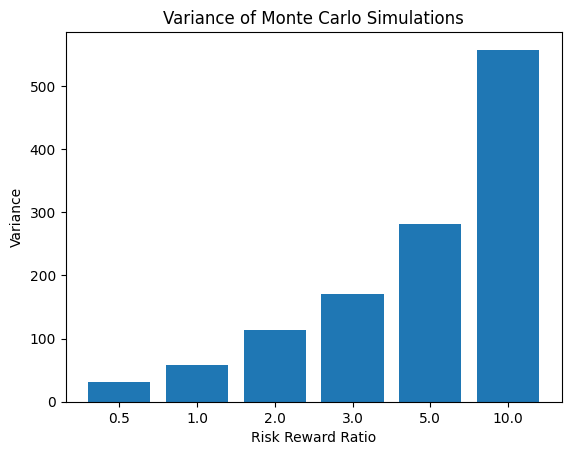

In [44]:
# Plot the variance of the Monte Carlo simulation
risk_reward_ratios = [str(sim.risk_reward) for sim in simulations]
variances = [np.var(sim.equity_curves) for sim in simulations]

print(variances)
plt.bar(risk_reward_ratios, variances)
plt.title('Variance of Monte Carlo Simulations')
plt.xlabel('Risk Reward Ratio')
plt.ylabel('Variance')
plt.show()

[-22.058823529411764, -34.31372549019608, -48.113207547169814, -66.0, -86.86868686868688, -100.0]


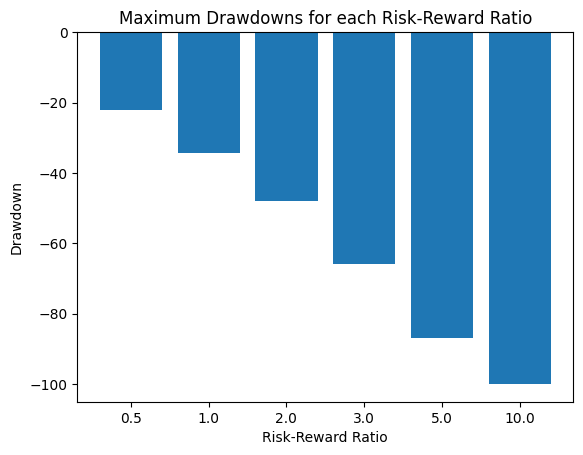

In [45]:
risk_reward_ratios = [str(sim.risk_reward) for sim in simulations]
max_drawdowns = [np.min(sim.drawdowns) for sim in simulations]

print(max_drawdowns)
# Create a bar chart
plt.bar(risk_reward_ratios, max_drawdowns)

# Add labels and title to the plot
plt.title('Maximum Drawdowns for each Risk-Reward Ratio')
plt.xlabel('Risk-Reward Ratio')
plt.ylabel('Drawdown')
plt.show()



[-1.4471603622332891, -2.6681129580928533, -4.482168066021089, -5.838015325242016, -7.950247999705048, -11.425852998239034]


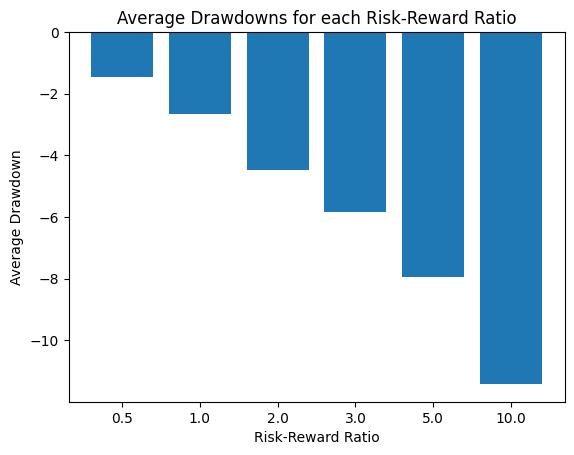

In [46]:
risk_reward_ratios = [str(sim.risk_reward) for sim in simulations]
avg_drawdowns = [np.mean(sim.drawdowns) for sim in simulations]

print(avg_drawdowns)
# Create a bar chart
plt.bar(risk_reward_ratios, avg_drawdowns)

# Add labels and title to the plot
plt.title('Average Drawdowns for each Risk-Reward Ratio')
plt.xlabel('Risk-Reward Ratio')
plt.ylabel('Average Drawdown')
plt.show()


[0.9289999999999999, 9.064, 26.296000000000003, 38.102000000000004, 52.75300000000001, 67.575]


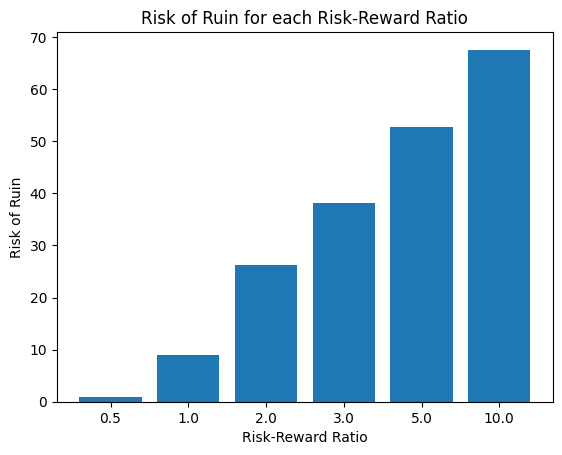

In [48]:
# Set the critical at wich the trader has to stop trading
critical_level = 90

# Calculate the risk of ruin for each simulation
risks_of_ruin = [sum(np.min(ec) <= critical_level for ec in sim.equity_curves) / num_simulations * 100 for sim in simulations]
risk_reward_ratios = [str(sim.risk_reward) for sim in simulations]

print(risks_of_ruin)
# Create a bar chart
plt.bar(risk_reward_ratios, risks_of_ruin)

# Add labels and title to the plot
plt.title('Risk of Ruin for each Risk-Reward Ratio')
plt.xlabel('Risk-Reward Ratio')
plt.ylabel('Risk of Ruin')
plt.show()
